In [1]:
!nvidia-smi

Thu Nov 24 19:03:39 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers accelerate scipy xformers gradio -q


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 5.5 MB 6.9 MB/s 
     |████████████████████████████████| 175 kB 60.2 MB/s 
     |████████████████████████████████| 292 kB 64.0 MB/s 
     |████████████████████████████████| 232 kB 64.6 MB/s 
     |████████████████████████████████| 182 kB 69.4 MB/s 
     |████████████████████████████████| 7.6 MB 48.2 MB/s 


In [3]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

Error No module named 'triton'


In [4]:
model_id = "stabilityai/stable-diffusion-2"

# Use the Euler scheduler here instead
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, revision="fp16", torch_dtype=torch.float16)
pipe = pipe.to("cuda")


Downloading:   0%|          | 0.00/345 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/475 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/624 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/460 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/815 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/900 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/602 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/diffusers/models/attention.py:430: UserWarning: Could not enable memory efficient attention. Make sure xformers is installed correctly and a GPU is available: For now only a certain number of K values are supported. Let us know if you hit this and we will fix it
  "Could not enable memory efficient attention. Make sure xformers is installed"
ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing 

In [ ]:
prompt = "realistic photo of 3d cartoon style of a cat in a space suit with milky way background"

In [20]:



def txt2img(prompt):

  image = pipe(prompt, height=768, width=768, guidance_scale = 10).images[0]
    
  image.save("sd_image.png")

  return image


  0%|          | 0/50 [00:00<?, ?it/s]

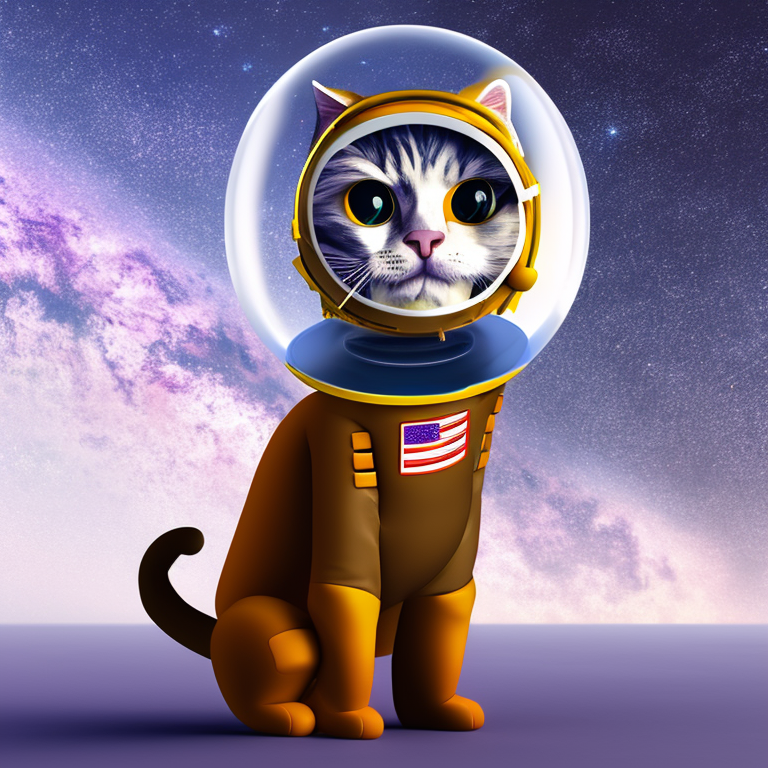

In [21]:
txt2img(prompt)

In [14]:
!pip install gradio -q

     |████████████████████████████████| 11.6 MB 7.7 MB/s 
     |████████████████████████████████| 56 kB 5.7 MB/s 
     |████████████████████████████████| 54 kB 3.9 MB/s 
     |████████████████████████████████| 84 kB 4.9 MB/s 
     |████████████████████████████████| 278 kB 90.4 MB/s 
     |████████████████████████████████| 2.3 MB 50.8 MB/s 
     |████████████████████████████████| 106 kB 69.5 MB/s 
     |████████████████████████████████| 213 kB 71.2 MB/s 
     |████████████████████████████████| 84 kB 3.8 MB/s 
     |████████████████████████████████| 55 kB 4.2 MB/s 
     |████████████████████████████████| 64 kB 3.0 MB/s 
     |████████████████████████████████| 80 kB 11.2 MB/s 
     |████████████████████████████████| 68 kB 7.6 MB/s 
     |████████████████████████████████| 68 kB 7.6 MB/s 
     |████████████████████████████████| 68 kB 8.2 MB/s 
     |████████████████████████████████| 46 kB 5.1 MB/s 
     |████████████████████████████████| 593 kB 61.4 MB/s 
     |█████████████████████████████

In [ ]:
import gradio as gr 

gr.Interface(txt2img, gr.Text(), gr.Image(), title = 'Stable Diffusion 2.0 Colab with Gradio UI').launch(share = True, debug = True)